In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Homework 5: In Vino Veritas

Due: Thursday, November 13, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW5.ipynb download=HW5.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work.

<img src="http://www.winemaniacs.com/wp-content/uploads/2013/04/WineRotator-2000x925.jpg">

Can a winemaker predict how a wine will be received based on the chemical properties of the wine? Are there chemical indicators that correlate more strongly with the perceived "quality" of a wine?

In this problem we'll examine the wine quality dataset hosted on the <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">UCI website</a>. This data records 11 chemical properties (such as the concentrations of sugar, citric acid, alcohol, pH etc.) of thousands of red and white wines from northern Portugal, as well as the quality of the wines, recorded on a scale from 1 to 10. In this problem, we will only look at the data for *red* wine.

### Problem 1: Data Collection

Import only the data for **red** wine from the <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'>dataset repository</a>. **Build a pandas dataframe** from the csv file and **print the head**. You might have to change the default delimiter used by the <a href='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html'>read_csv</a> function in Pandas.

In [2]:
## your code here
redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 
                      delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As in any machine learning problem, we have the feature data, usually labeled as $X$, and the target data, labeled $Y$. Every row in the matrix $X$ is a datapoint (i.e. a wine) and every column in $X$ is a feature of the data (e.g. pH). For a classification problem, $Y$ is a column vector containing the class of every datapoint.

We will use the *quality* column as our target variable. **Save the *quality* column as a separate numpy array** (labeled $Y$) and **remove the *quality* column** from the dataframe.

Also, we will simplify the problem to a binary world in which wines are either "bad" ($\text{score} < 7$) or "good" ($\text{score} \geq 7)$. **Change the $Y$ array** accordingly such that it only contains zeros ("bad" wines) and ones ("good" wines). For example, if originally $Y = [1,3,8,4,7]$, the new $Y$ should be $[0,0,1,0,1]$.

In [3]:
## your code here
Y = redwine.pop('quality')
Y = Y.apply(lambda x: 1 if x >= 7 else 0)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

Use the <a href='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html'>as_matrix</a> function in Pandas to **save the feature information in your data frame as a numpy array**. This is the $X$ matrix.

In [4]:
## your code here
X = redwine.as_matrix()

### Problem 2: Unbalanced Classification Evaluation

In this section, we explore a number of different methods to predict the quality of a wine $Y$ based on the recorded features $X$. Formulated as a machine learning problem, we wish to predict the **target** $Y$ as a function of the **features** $X$.

Because we have defined $Y$ as a binary variable (encoding *bad* as 0 and *good* as 1), this is a **classification** problem. In class, we have discussed several approaches to classifiction incuding **decision trees**, **random forests**, and **Support Vector Machines (SVM)**. 

For this problem, we will focus on **random forests**, but we will later in the Problem set invoke these other techniques. Recall from class that the random forest technique works by aggregating the results from a number of randomly perturbed decision trees constructed to explain the data.

**(a)** In class, we saw that for a fixed set of data, a decision tree algorithm will generate a single fixed tree to perform a classification task. Describe how a random forest is built from individual decision trees. What are the sources of randomness in the process that are used to build a diverse set of decision trees?

**YOUR ANSWER HERE.**
    Random forests are built by bootstrapping the data and gives each tree a random portion of the features.

**(b)** There are many ways to construct a random forest -- these differences in the method of construction are encoded as *tuning parameters*. As is often the case when our goal is to construct a good prediction, we can set these tuning parameters to obtain the best projected performance in a prediction task. One of the most important tuning parameters in building a random forest is the number of trees to construct. 

Here, you should apply the random forest classifier to the wine data and use cross-validation to explore how the score of the classifier changes when varying the number of trees in the forest. Use the <a href='http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>random forest classifier</a> built into the scikit-learn library and the <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score'>cross_val_score</a> function (using the default scoring method) to **plot the scores of the random forests as a function of the number of trees** in the random forest, ranging from 1 (simple decision tree) to 40. You should use 10-fold cross-validation. Feel free to use the boxplot functionality of the <a href='http://web.stanford.edu/~mwaskom/software/seaborn/index.html'>seaborn</a> library.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## your code here
trees = [x for x in range(1, 41)]
scores = []
for tree in trees:
    clf = RandomForestClassifier(n_estimators=tree)
    score = cross_val_score(clf, X, Y, cv=10)
    scores.append(score)

/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


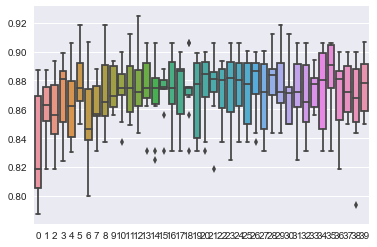

In [6]:
sns.boxplot(data=scores, names=trees)

**(c)** Describe the relationship between cross validation accuracy and the number of trees. What tradeoffs should we consider when choosing the number of trees to use?

**YOUR ANSWER HERE.** More trees increase accuracy but more trees also take longer to train.

**(d)** These accuracy scores look very promising compared to, say, classifying the wine using a coinflip. However, in binary classification problems, accuracy can be misleading if one class (say, bad wine) is much more common than another (say, good wine), this is, when the classes are **unbalanced**.

**Print** the percentage of wines that are labeled as "bad" in the dataset and **plot the same boxplot** as the last question (feel free to copy/paste), but this time draw a line across the plot denoting the **accuracy** of always guessing zero ("bad wine").

0.864290181363


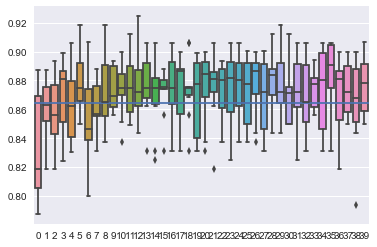

In [7]:
## your code here
balance = 1 - Y.sum()/float(Y.size)
print(balance)

sns.boxplot(data=scores, names=trees)
plt.axhline(balance)

###Evaluation Metrics

When there are unbalanced classes in a dataset, guessing the more common class will often yield very high accuracy. For this reason, we usually want to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers. These metrics were originally developed for clinical trials, so to keep with the standard terminology, we define "good" wines (value of 1) as "positive" and the "bad" wines (value of 0) as the "negatives". We then define the following:

$P$ - number of positives in the sample.

$N$ - number of negatives in the sample.

$TP$ - number of true positives: how many of the "positive" guesses of the classifier are true.

$FP$ - number of false positives: how many of the "positive" guesses of the classifier are actually negatives.

$TN$ - number of true negatives; similarly, this is how many of the "negative" guesses of the classifier are true.

$FN$ - number of false negatives; how many of the "negative" guesses are actually positives.

When calling the score functions in scikit-learn you obtained the default measure of efficiency, which is called **accuracy**. This is simply the ratio of successful guesses (both positives and negatives) across all samples:
$$\text{accuracy} = \frac{TP + TN}{P+N}.$$
In our case, when the two classes (good and bad wines) are very unbalanced in the sample, we should look for a better measure of efficiency. 

Usually, the goal is to identify the members of the positive class (the rare class) successfully -- this could be either the good wines or the patients presenting a rare disease. It is common practice to define the following ratios:

The **recall** rate (also called the sensitivity or the true positive rate) is the ratio of true positive guesses among all positives:
$$\text{recall} = \frac{TP}{P}=\frac{TP}{TP+FN}.$$
The **precision** is the ratio of the true positive guesses over all the positive guesses:
$$\text{precision} = \frac{TP}{TP+FP}.$$

**(e)** Describe in words what the **difference** is between **precision** and **recall**. Describe an **application scenario** where precision would be more important than recall, and one scenario where recall would be more important than precision.

**YOUR ANSWER HERE.** 
    Precision is the amount of report positive are positive. Recall is how much of the actual positive data was selected.

Because precision and recall both provide valuable information about the quality of a classifier, we often want to combine them into a single general-purpose score. The **F1** score is defined as the harmonic mean of recall and precision:
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$

The harmonic mean of two numbers is closer to the smaller of the two numbers than the standard arithmetic mean. The F1 score thus tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

**(f)** For this part, **repeat the cross-validation analysis in part (b) changing the `scoring` parameter** of the cross_val_score function such that the measure used is the **F1 score**. **Comment** briefly on these numbers. Hint: See the <a href="http://scikit-learn.org/stable/modules/model_evaluation.html">scikit-learn documentation</a> for the options you can use for the *scoring* parameter.

In [8]:
## your code here
trees = [x for x in range(1, 41)]
scores_mod = []
for tree in trees:
    clf = RandomForestClassifier(n_estimators=tree)
    score = cross_val_score(clf, X, Y, cv=10, scoring='f1')
    scores_mod.append(score)

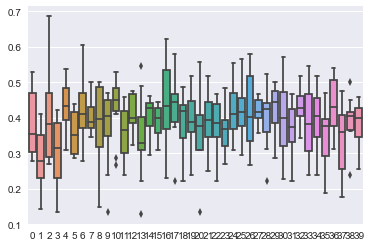

In [9]:
sns.boxplot(data=scores_mod, names=trees)

**YOUR DISCUSSION HERE.** 
    Random forest has a hard time optimizing the f1 score.

### Problem 3: Classifier Calibration

Many classifiers, including random forest classifiers, can return **prediction probabilities**, which can be interpreted as the probability that a given prediction point falls into a given class (i.e., given the data $X$ and a candidate class $c$, the prediction probability states $P(Y = c | X)$). However, when the classes in the training data are **unbalanced**, as in this wine example, these prediction probabilities calculated by a classifier can be inaccurate. This is because many classifiers, again including random forests, do not have a way to internally adjust for this imbalance.

Despite the inaccuracy caused by imbalance, the prediction probabilities returned by a classifier can still be used to construct good predictions if we can choose the right way to turn a prediction probability into a prediction about the class that the datapoint belongs to. We call this task **calibration**.

If a classifier's prediction probabilities are accurate, the appropriate way to convert its probabilities into predictions is to simply choose the class with probability > 0.5. This is the default behavior of classifiers when we call their `predict` method. When the probabilities are inaccurate, this does not work well, but we can still get good predictions by choosing a more appropriate cutoff. In this question, we will choose a cutoff by cross validation.

**(a)** Fit a random forest classifier to the wine data **using 15 trees**. Compute the **predicted probabilities** that the classifier assigned to each of the training examples (Hint: Use the `predict_proba` method of the classifier after fitting.). As a **sanity test**, construct a prediction based on these predicted probabilities that labels all wines with a predicted probability of being in class 1 > 0.5 with a 1 and 0 otherwise. For example, if originally probabilities $= [0.1,0.4,0.5,0.6,0.7]$, the predictions should be $[0,0,0,1,1]$. **Compare** this to the output of the classifier's `predict` method, and **show that they are the same**. 

In [10]:
## your code here
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf.fit(X, Y)
proba =  (clf.predict_proba(X)[:, 1] > .5).astype(int)
pred = clf.predict(X)
(proba == pred).all()

True

**(b)** **Write a function** `cutoff_predict` that takes a **trained** classifier, a data matrix X, and a cutoff, and generates predictions based on the classifier's predicted **probability and the cutoff value**, as you did in the previous question.

In [11]:
"""
cutoff_predict(clf, X, cutoff)

Inputs:
clf: a **trained** classifier object
X: a 2D numpy array of features
cutoff: a float giving the cutoff value used to convert
        predicted probabilities into a 0/1 prediction.

Output:
a numpy array of 0/1 predictions.
"""
## your code here
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:, 1] > cutoff).astype(int)

**(c)** Using **10-fold cross validation** find a cutoff in `np.arange(0.1,0.9,0.1)` that gives the best average **F1 score** when converting prediction probabilities from a **15-tree** random forest classifier into predictions.

To help you with this task, we have provided you a function `custom_f1` that takes a cutoff value and returns a function suitable for using as the `scoring` argument to `cross_val_score`. **This function uses the `cutoff_predict` function that you defined in the previous question**.

Using a **boxplot**, compare the **F1 scores** that correspond to each candidate **cutoff** value.

In [12]:
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
        
    return f1_cutoff

## your code here
cutoffs = np.arange(0.1, 0.9, 0.1)
scores = []

for cutoff in cutoffs:
    clf = RandomForestClassifier(n_estimators=15)
    score = cross_val_score(clf, X, Y, scoring=custom_f1(cutoff), cv=10)
    scores.append(score)

/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


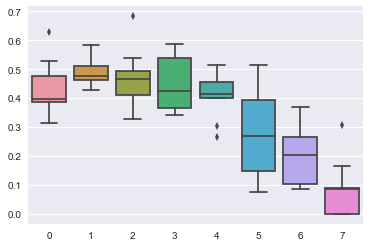

In [13]:
sns.boxplot(data=scores, names=cutoffs)

**(d)** According to this analysis, which cutoff value gives the **best predictive results**? **Explain** why this answer makes sense in light of the **unbalanced** classes in the training data.

**YOUR ANSWER HERE.** 
    The best cutoff value is 0.2 to 0.3. This makes sense because the percentage of good wines is ~14%. Thus, the cutoff value should be below 0.5.

### Problem 4: Visualizing Classifiers Using Decision Surfaces

One common visual summary of a classifier is its decision surface. Recall that a trained classifier takes in features $X$ and tries to predict a target $Y$. We can visualize how the classifier translates different inputs $X$ into a guess for $Y$ by plotting the classifier's **prediction probability** (that is, for a given class $c$, the assigned probability that $Y = c$) as a function of the features $X$. Most classifiers in scikit-learn have a method called `predict_proba` that computes this quantity for new examples after the classifier has been trained.

**(a)** Decision surface visualizations are really only meaningful if they are plotted against inputs $X$ that are one- or two-dimensional. So before we plot these surfaces, we will first find **two "important" dimensions** of $X$ to focus on. Recall that in the last homework we used SVD to perform a similar task. Here, we will use a different dimension reduction method based on random forests.

Random forests allow us to compute a heuristic for determining how "important" a feature is in predicting a target. This heuristic measures the change in prediction accuracy if we take a given feature and permute (scramble) it across the datapoints in the training set. The  more the accuracy drops when the feature is permuted, the more "important" we can conclude the feature is. Importance can be a useful way to select a small number of features for visualization.

As you did in the last question, train a random forest classifier on the wine data using **15 trees**. Use the `feature_importances_` attribute of the classifier to obtain the relative importance of the features. These features are the columns of the dataframe. Show a simple **bar plot** showing the relative importance of the named features of the wines in the databes.

In [14]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


([<matplotlib.axis.XTick at 0x11a441950>,
 <a list of 11 Text xticklabel objects>)

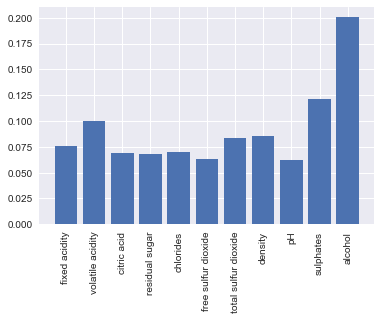

In [15]:
## your code here
forest = RandomForestClassifier(n_estimators=15)
forest.fit(X, Y)
importance = forest.feature_importances_
features = np.arange(len(importance))

plt.bar(features, importance)
plt.xticks(features, redwine.columns, rotation='vertical')

**(b)** Below, we have provided you with a function `plot_decision_surface` that plots a classifier's decision surface, taking as arguments a classifier object, a two-column feature matrix, and a target vector.

Using this function and the results from the "importance" analysis above, **subset** the data matrix to include just the **two features of highest importance**. Then **plot** the decision surfaces of a <a href='http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier'>decision tree classifier</a>,  and a random forest classifier with **number of trees set to 15**, and a <a href='http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'> support vector machine</a> **with `C` set to 100, and `gamma` set to 1.0**. 

In [16]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
## your code here
two_highest = []
while len(two_highest) < 2:
    curr_max = np.argmax(importance)
    importance = np.delete(importance, curr_max)
    two_highest.append(X[:, curr_max])
    
two_highest = np.array(two_highest).T

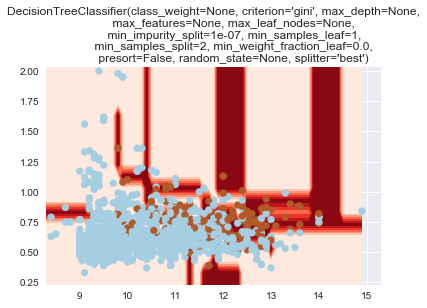

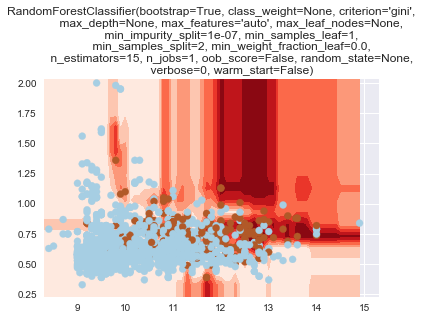

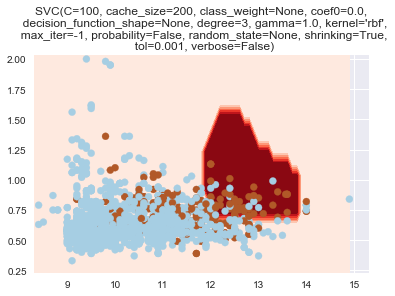

In [18]:
models = [tree, forest, clf]

tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=15)
clf = sklearn.svm.SVC(C=100, gamma=1.0)

for model in models:
    plt.title(str(model))
    plot_decision_surface(model, two_highest, Y)

**(c)** Recall from the lecture that there is a tradeoff between the bias and the variance of a classifier. We want to choose a model that generalizes well to unseen data. With a **high-variance** classifier we run the risk of **overfitting** to noisy or unrepresentative training data. In contrast, classifier with a **high bias** typically produce simpler models that tend to **underfit** the training data, failing to capture important regularities. 

Discuss the differences in the above decision surfaces in terms of their **complexity** and  **sensitivity** to the training data. How do these properties relate to **bias** and **variance**?

**YOUR ANSWER HERE.**
    Decision tree classifier both are very sensitive while the random forest classifer and SVM are less sensitive due to the gradual color fade and/or the fact that the groups are all gathered together.However, the decision tree classifier and the random forest classifier are more complex than the SVM due to the wiggly nature of the dividers.
    Complexity reduces the bias but this complexity increases the sensitivity which causes the varience to increase.

**(d)** The <a href='http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'> SVM</a> implementation of sklearn has an **optional parameter** `class_weight`. This parameter is set to `None` per default, but it also provides an `auto` mode, which uses the values of the labels Y to **automatically adjust weights** inversely proportional to class frequencies. As done in sub-problem 4(b), **draw the decision boundaries** for two SVM classifiers. **Use `C=1.0`, and `gamma=1.0`** for **both** models, but for the first SVM set `class_weigth` to **`None`**, and for the second SVM set `class_weigth` to **`'auto'`**. (Hint: `None` is a keyword in Python, whereas the `'auto'` is a String and needs the quotation marks.) 

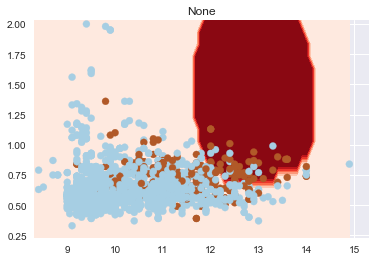

/Users/William/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


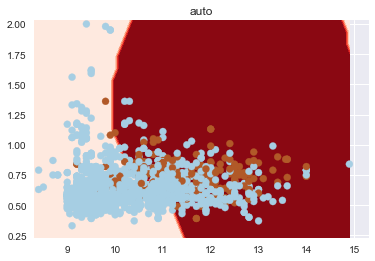

In [23]:
## your Code here
params = [None, 'auto']

for param in params:
    clf = sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight=param)
    plt.title(str(param))
    plot_decision_surface(clf, two_highest, Y)

**(e)** Discuss the difference in the decision boundary with respect to **precision**, **recall**, and **overall performance**. How could the performance be **improved**? 

**YOUR ANSWER HERE**
    With no class weight, the SVM has good recall but poor precision and the reverse is true for when the class weight is "auto." The overall performance of both is less than stellar and to improve both, more paramaters would need to be tuned properly.

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
